In [3]:
# pip install seaborn

In [13]:
# import the required libraries
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# start with the common text words
print('hello, world!')

hello, world!


In [6]:
# next, do basic math
i = 2
j = 3
print(str(i) + ' + ' + str(j) + ' = ' + str(i + j))
print(str(i) + ' - ' + str(j) + ' = ' + str(i - j))
print(str(i) + ' * ' + str(j) + ' = ' + str(i * j))
print(str(i) + ' / ' + str(j) + ' = ' + str(i / j))

2 + 3 = 5
2 - 3 = -1
2 * 3 = 6
2 / 3 = 0.6666666666666666


In [7]:
# iteration
i = 0
for i in range(5):
    print(str(i))

0
1
2
3
4


In [ ]:
# load csv file list
# data source: https://statistics.jnto.go.jp/en/graph/#graph--inbound--travelers--transition
file_list = glob.glob('./*.csv')
print(file_list[0])

.\Foreign_Tourists_to_Japan_by_month.csv


In [97]:
# read csv file and take a look
df_sample = pd.read_csv(file_list[0])
df_sample.head()

,Country/Area,Month (abbr),Year,Growth Rate(%),Visitor Arrivals
0,Afghanistan,Jan.,2019,NaN,263
1,Afghanistan,Feb.,2019,NaN,205
2,Afghanistan,Mar.,2019,NaN,245
3,Afghanistan,Apr.,2019,NaN,244
4,Afghanistan,May,2019,NaN,172


In [98]:
# check data size, columns, non-null count and data type
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Area      16800 non-null  object
 1   Month (abbr)      16800 non-null  object
 2   Year              16800 non-null  int64 
 3   Growth Rate(%)    13303 non-null  object
 4   Visitor Arrivals  15200 non-null  object
dtypes: int64(1), object(4)
memory usage: 656.4+ KB


In [99]:
# fill null value with 0 for 2 columns
df_sample.fillna({"Growth Rate(%)": 0}, inplace=True)
df_sample.fillna({"Visitor Arrivals": 0}, inplace=True)

In [100]:
df_sample["Visitor Arrivals"].sample(10)

2270      3,220
15547       211
11918         6
15971         0
5103          5
9818         42
15756       509
6524     32,354
10976     2,019
3503        198
Name: Visitor Arrivals, dtype: object

In [101]:
df_sample["Month (abbr)"].unique()

array(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.',
       'Sep.', 'Oct.', 'Nov.', 'Dec.'], dtype=object)

In [102]:
# create a dictionary to convert month from character to number
# I see May miss period unlike the other months. Need to map it carefully.
dict_month_map = {
    "Jan.":1,"Feb.":2, "Mar.":3, "Apr.":4,
    "May":5,"Jun.":6,"Jul.":7,"Aug.":8,
    "Sep.":9,"Oct.":10,"Nov.":11,"Dec.":12
    }

In [103]:
# convert Month data from character to numeric
df_sample["Month (abbr)"] = df_sample["Month (abbr)"].apply(lambda x: dict_month_map[x])
# rename columns
df_sample.rename(columns={"Month (abbr)": "Month"}, inplace=True)
# change the data type for some columns
df_sample["Month"] = df_sample["Month"].astype(int)
df_sample["Growth Rate(%)"] = df_sample["Growth Rate(%)"].str.replace(',', '').astype(float)
df_sample["Visitor Arrivals"] = df_sample["Visitor Arrivals"].str.replace(',','').astype("Int64")
df_sample.head()


,Country/Area,Month,Year,Growth Rate(%),Visitor Arrivals
0,Afghanistan,1,2019,NaN,263
1,Afghanistan,2,2019,NaN,205
2,Afghanistan,3,2019,NaN,245
3,Afghanistan,4,2019,NaN,244
4,Afghanistan,5,2019,NaN,172


In [104]:
# check the value of the year
df_sample["Year"].unique()

array([2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [107]:
# create a new dataframe which is aggregated by year and month
df_agg = df_sample.groupby(["Year","Month"]).agg({"Visitor Arrivals": np.sum}).reset_index()
df_agg.head()

C:\Users\yusuk\AppData\Local\Temp\ipykernel_19936\3718857973.py:2: FutureWarning: The provided callable <function sum at 0x0000017D6A07FB00> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_agg = df_sample.groupby(["Year","Month"]).agg({"Visitor Arrivals": np.sum}).reset_index()


,Year,Month,Visitor Arrivals
0,2019,1,2689339
1,2019,2,2604322
2,2019,3,2760136
3,2019,4,2926685
4,2019,5,2773091


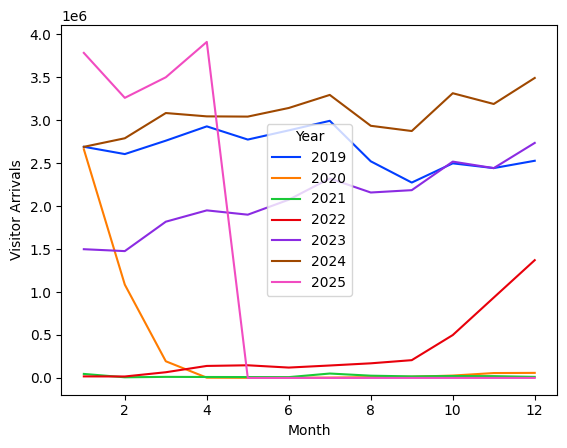

In [112]:
# draw a line chart to see the trend of visitors by month
sns.lineplot(data=df_agg, x="Month",y="Visitor Arrivals",hue="Year",palette="bright")
plt.show()

In [113]:
# export the preprocessed data
df_sample.to_csv('foreign_tourists_to_japan_by_month_preprocessed.csv',header=True,index=False)

In [114]:
df_agg.head()

,Year,Month,Visitor Arrivals
0,2019,1,2689339
1,2019,2,2604322
2,2019,3,2760136
3,2019,4,2926685
4,2019,5,2773091


### Analysis from the data (by utilizing PowerBI dashboard)

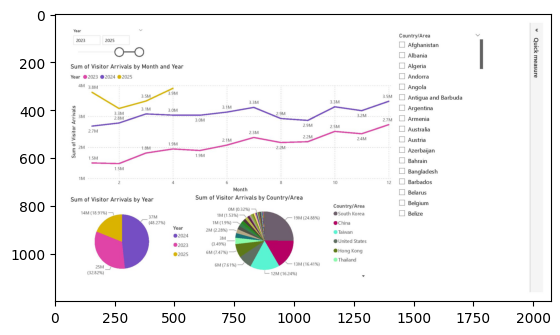

In [ ]:
# import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('PowerBI_foreign_tourist_to_Japan_analysis-page-001.jpg')
plt.imshow(img)
plt.show()

## High-Level Summary
- 2020 is an outlier, as the number of tourists dropped significantly worldwide due to COVID-19, which began in February 2020.
- The impact of COVID-19 continued until around early 2023.
- The number of tourists began rising gradually from 2023.
- In 2024, 37 million visitors arrived—an increase of 48% compared to 2023’s 25 million.
- 2025 data is available up to April.
## Comments
- Visitor numbers are expected to increase in 2025, as each month from January to April recorded more visitors than the same month in 2024.
- While this trend is a positive sign for Japan’s economy, the tourism industry must prepare for potential challenges, such as overtourism.


## Next action
* dive deep to check the visitors by country/area by month and see if any action is required in the tourism industry 
 * (e.g. The top contributor South Korea, nearly 25% of total visitors, has a trend of lower visitors in summer while higher visitors in winter. Ask why and see if any opportunities)
 * collect the visitor by area and check the correlation with month and see if any opportunities / improvement
